# Exploratory Data Analysis Starter

## Import packages

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [8]:
client_df= pd.read_csv(r"client_data.csv")
price_df=pd.read_csv(r"price_data.csv")


You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [9]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [10]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [13]:
client_df.isnull().sum().sort_values(ascending=False)

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
price_df.isnull().sum().sort_values(ascending=False)

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

# cleaning client data 

In [15]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    client_df[col] = pd.to_datetime(client_df[col])

# need to convert object into date time format to extract features like tenure

In [16]:
client_df=client_df.drop(columns=['channel_sales','origin_up'])
                #OR
#client_df.drop(columns=['channel_sales', 'origin_up'], inplace=True)
#inplace make changes in orginal dataframe
#since these two does not contibute to anything ,so dropping them

In [17]:
client_df['has_gas'].unique()

array(['t', 'f'], dtype=object)

In [18]:
client_df['has_gas'] = client_df['has_gas'].str.strip().map({'f': 0, 't': 1})


In [19]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   cons_12m                        14606 non-null  int64         
 2   cons_gas_12m                    14606 non-null  int64         
 3   cons_last_month                 14606 non-null  int64         
 4   date_activ                      14606 non-null  datetime64[ns]
 5   date_end                        14606 non-null  datetime64[ns]
 6   date_modif_prod                 14606 non-null  datetime64[ns]
 7   date_renewal                    14606 non-null  datetime64[ns]
 8   forecast_cons_12m               14606 non-null  float64       
 9   forecast_cons_year              14606 non-null  int64         
 10  forecast_discount_energy        14606 non-null  float64       
 11  fo

# cleaning price data

In [20]:
# converting object type date to date time format
price_df['price_date'] = pd.to_datetime(price_df['price_date'])


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [21]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [22]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [23]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

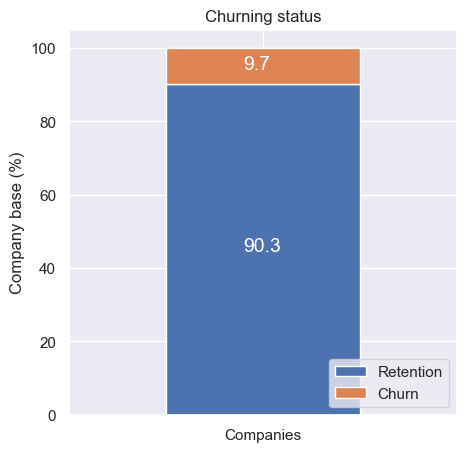

In [24]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

### visualization of client data

In [26]:
sns.set(style="whitegrid")

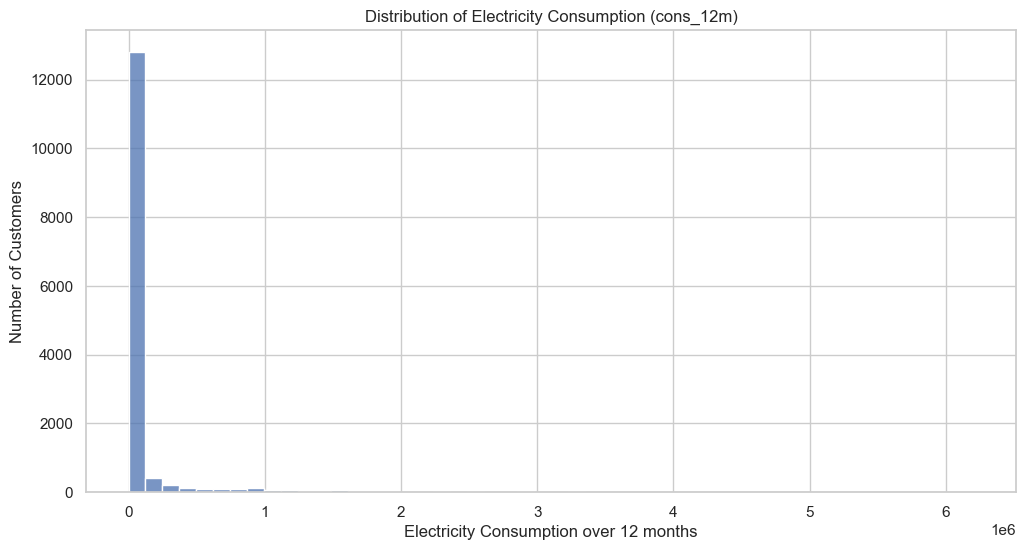

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data=client_df,x='cons_12m',bins=50)

plt.title('Distribution of Electricity Consumption (cons_12m)')
plt.xlabel('Electricity Consumption over 12 months')
plt.ylabel('Number of Customers')
plt.show()



the plot above doesn't show the information efficiently therefore i used log based plot 

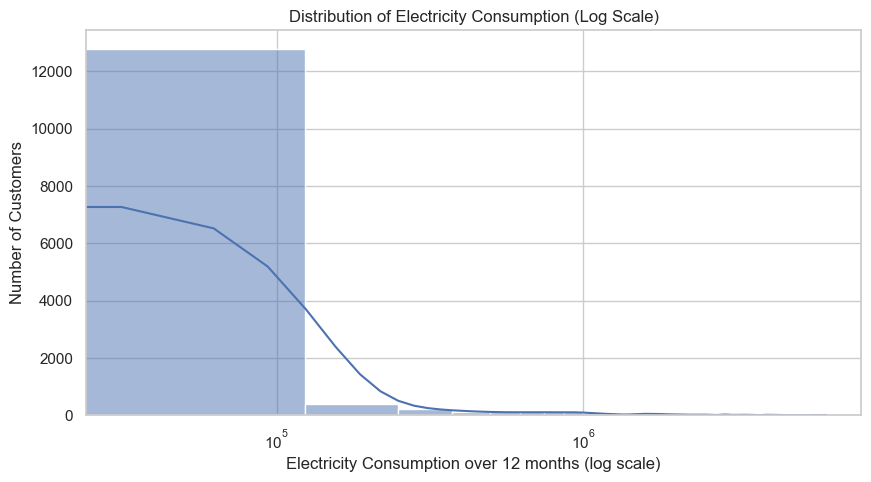

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=client_df, x='cons_12m', bins=50, kde=True)
plt.xscale('log')  #This is the key difference!
plt.title('Distribution of Electricity Consumption (Log Scale)')
plt.xlabel('Electricity Consumption over 12 months (log scale)')
plt.ylabel('Number of Customers')
plt.show()


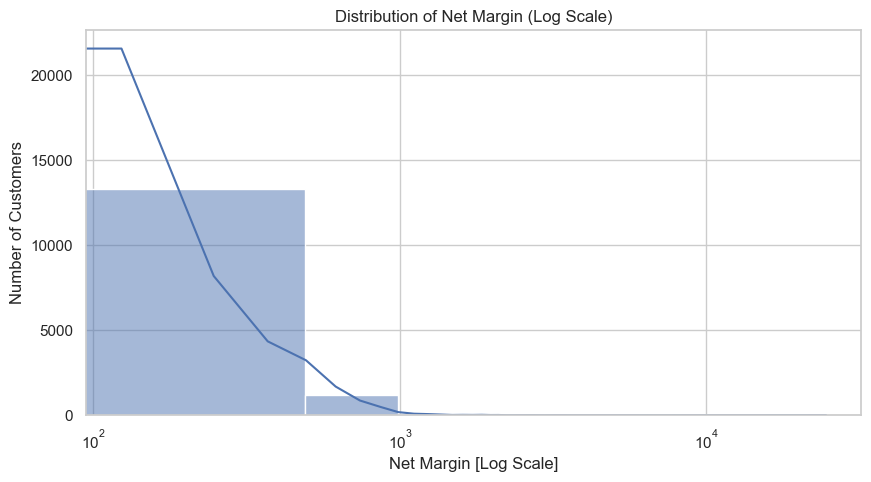

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data=client_df, x='net_margin', bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of Net Margin (Log Scale)')
plt.xlabel('Net Margin [Log Scale]')
plt.ylabel('Number of Customers')
plt.show()

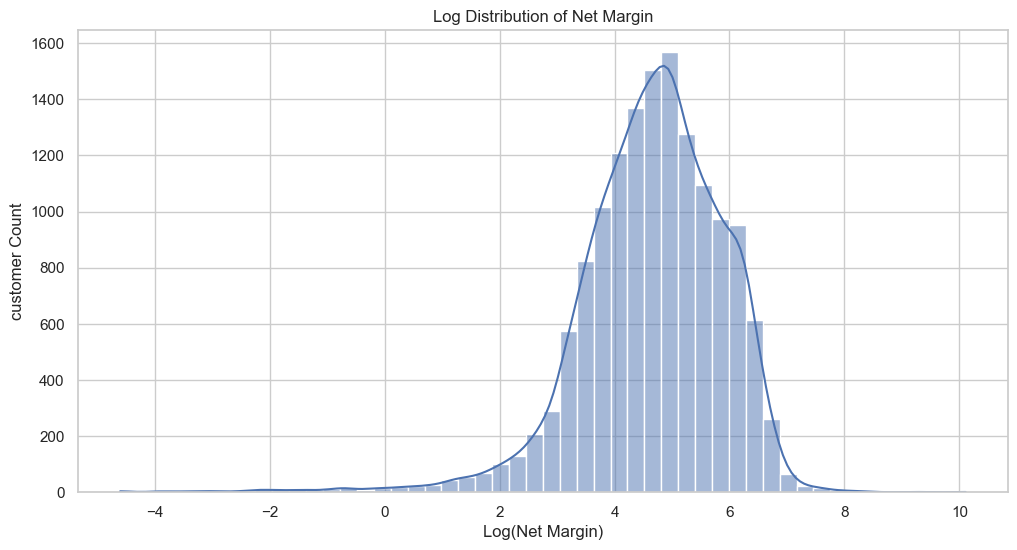

In [30]:
plt.figure(figsize=(12,6))
# Filter out zeros before taking log
log_net_margin = client_df[client_df['net_margin'] > 0]['net_margin'].apply(np.log)

sns.histplot(log_net_margin, kde=True, bins=50)
plt.title("Log Distribution of Net Margin")
plt.xlabel("Log(Net Margin)")
plt.ylabel("customer Count")
plt.show()


### churn distribution

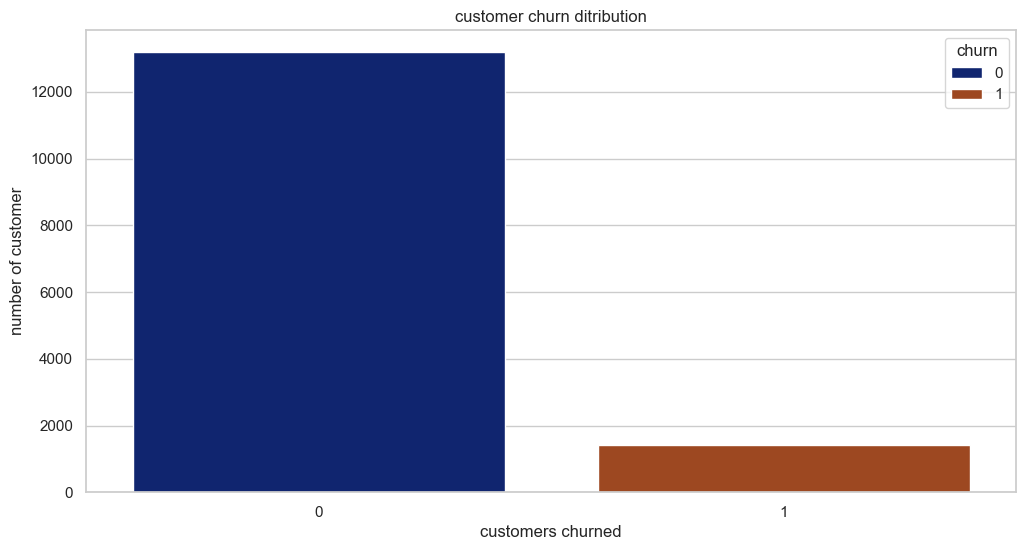

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x='churn',hue='churn',data=client_df,palette='dark')
plt.title('customer churn ditribution')
plt.xlabel('customers churned')
plt.ylabel('number of customer')
plt.show()

In [32]:
churn_counts = client_df['churn'].value_counts()
churn_percent = client_df['churn'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percent.round(2))

Churn Counts:
 churn
0    13187
1     1419
Name: count, dtype: int64

Churn Percentage:
 churn
0    90.28
1     9.72
Name: proportion, dtype: float64


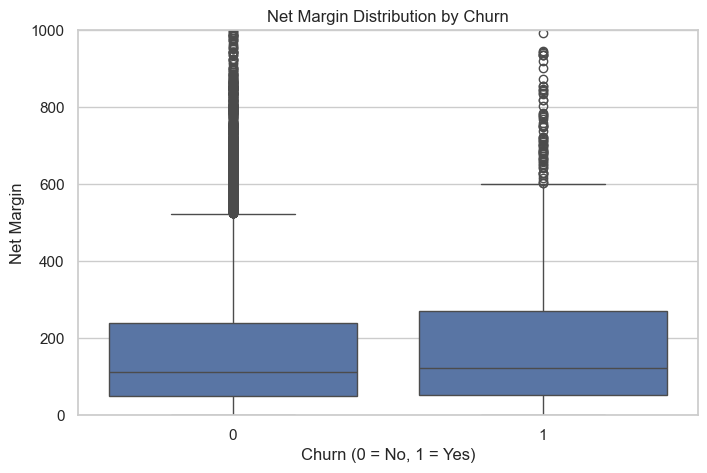

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='net_margin', data=client_df)
plt.ylim(0,1000)
plt.title('Net Margin Distribution by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Net Margin')
plt.show()


this suggest net margin is not the actual reason for customer to churn


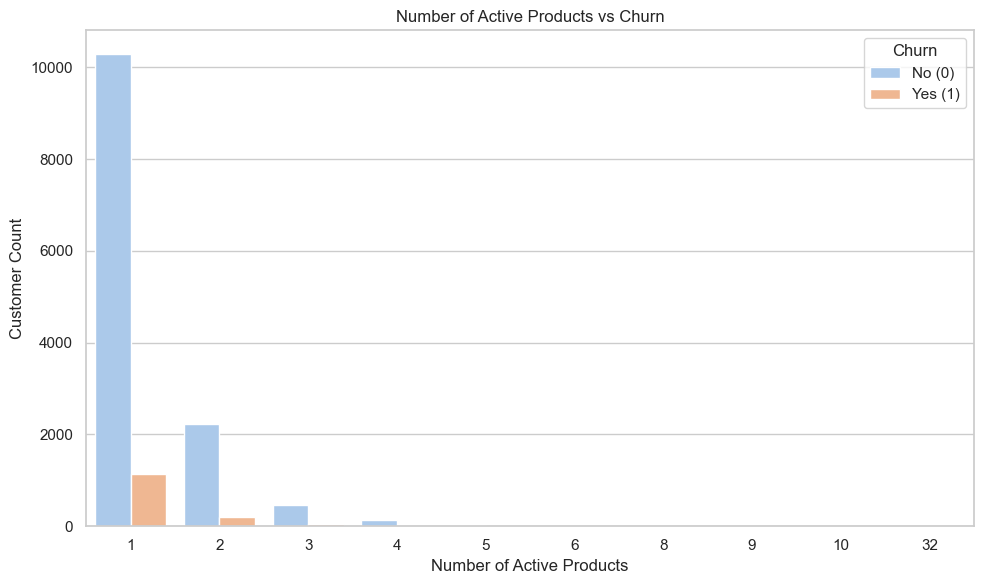

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=client_df, x='nb_prod_act', hue='churn', palette='pastel')

plt.title('Number of Active Products vs Churn')
plt.xlabel('Number of Active Products')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


so the customers with single product churn more than having even product ,got this .


### visualization of price data

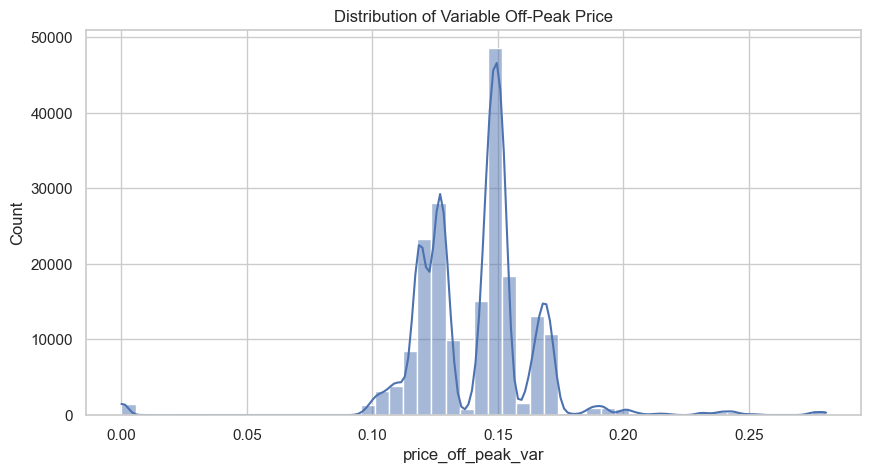

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(price_df['price_off_peak_var'], bins=50, kde=True)
plt.title('Distribution of Variable Off-Peak Price')
plt.xlabel('price_off_peak_var')
plt.ylabel('Count')
plt.show()

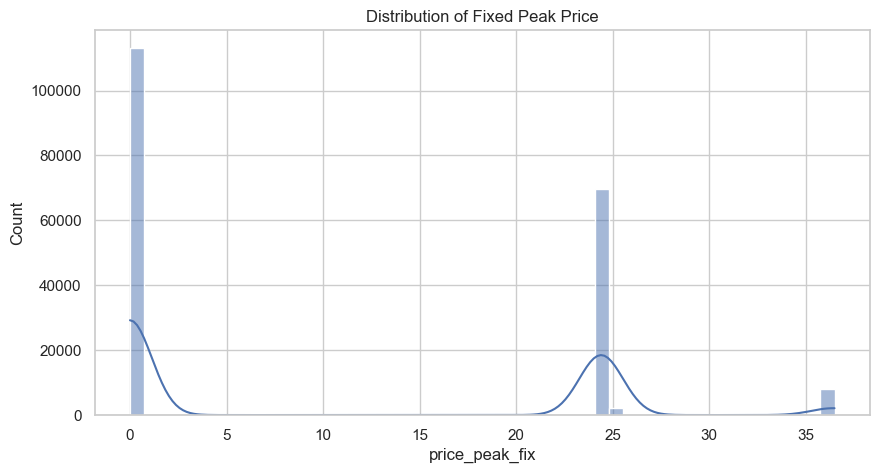

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(price_df['price_peak_fix'], bins=50, kde=True)
plt.title('Distribution of Fixed Peak Price')
plt.xlabel('price_peak_fix')
plt.ylabel('Count')
plt.show()

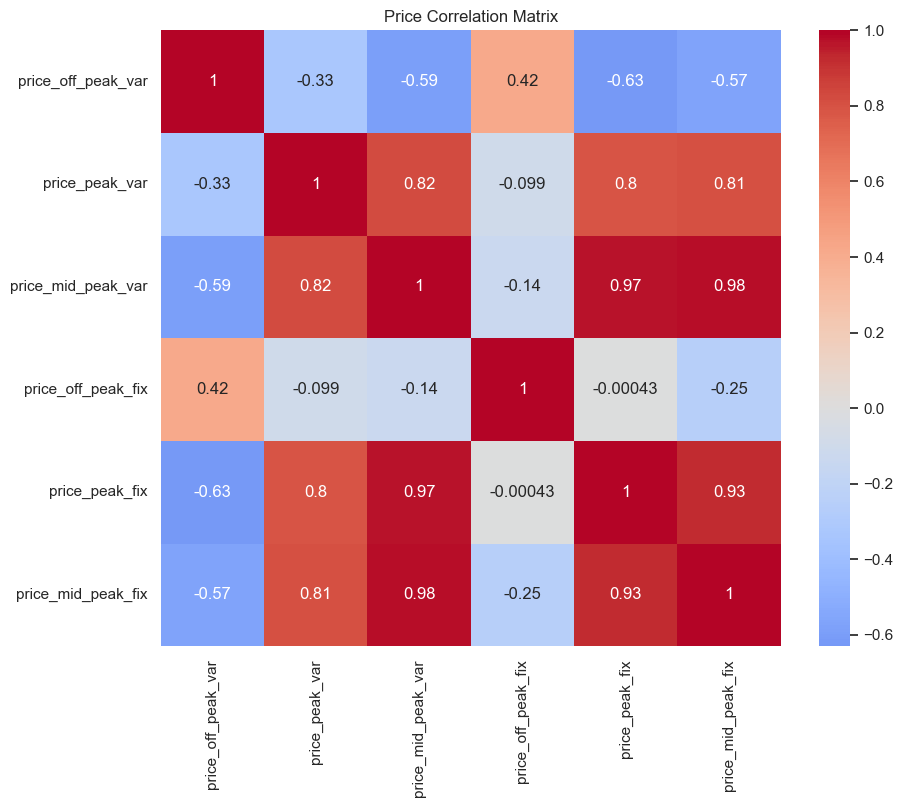

In [37]:
# Correlation between different price types
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 
              'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

plt.figure(figsize=(10, 8))
correlation_matrix = price_df[price_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Price Correlation Matrix')
plt.show()